In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
base_dir = "/content/asl_dataset/asl_dataset/asl_dataset"
img_size = 64
batch_size = 32
epochs = 10

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687,844 (2.62 MB)

 Trainable params: 687,844 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 349ms/step - accuracy: 0.0616 - loss: 3.4922 - val_accuracy: 0.3479 - val_loss: 2.1154
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 380ms/step - accuracy: 0.3631 - loss: 2.1420 - val_accuracy: 0.6481 - val_loss: 1.0782
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.5536 - loss: 1.4551 - val_accuracy: 0.6899 - val_loss: 0.9451
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 379ms/step - accuracy: 0.6270 - loss: 1.1446 - val_accuracy: 0.7455 - val_loss: 0.7175
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.6791 - loss: 0.9610 - val_accuracy: 0.7833 - val_loss: 0.6117
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 378ms/step - accuracy: 0.7294 - loss: 0.8092 - val_accuracy: 0.8250 - val_loss: 0.4885
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.7441 - loss: 0.7471 - val_accuracy: 0.7853 - val_loss: 0.5071
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 376ms/step - accuracy: 0.7720 - loss: 0.6237 - val_accu

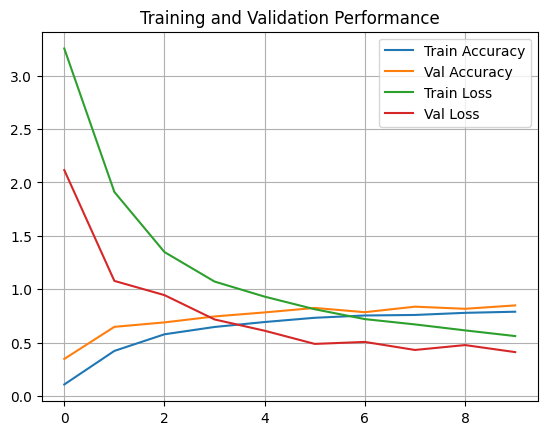

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.grid()
plt.title("Training and Validation Performance")
plt.show()

In [ ]:
# Evaluate the model on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255) # No augmentation for test data

# You might need to adjust the directory path and subset based on your actual data structure
test_generator = test_datagen.flow_from_directory(
    base_dir, # Use your base directory, adjust if test data is in a different location
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False # Do not shuffle test data for consistent evaluation
)

test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"🔻 Test Loss: {test_loss:.4f}")

Found 2515 images belonging to 36 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.9032 - loss: 0.2191

✅ Test Accuracy: 93.68%
🔻 Test Loss: 0.1747


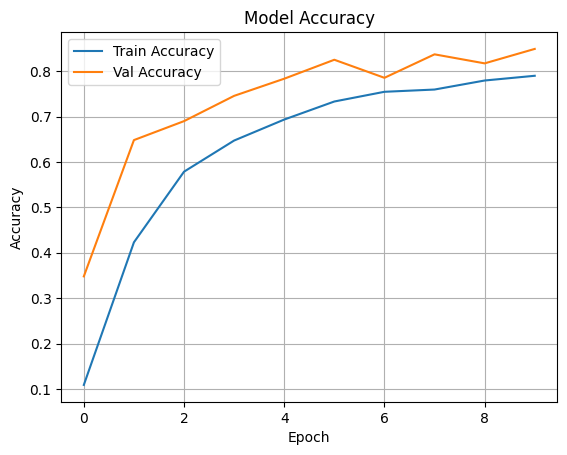

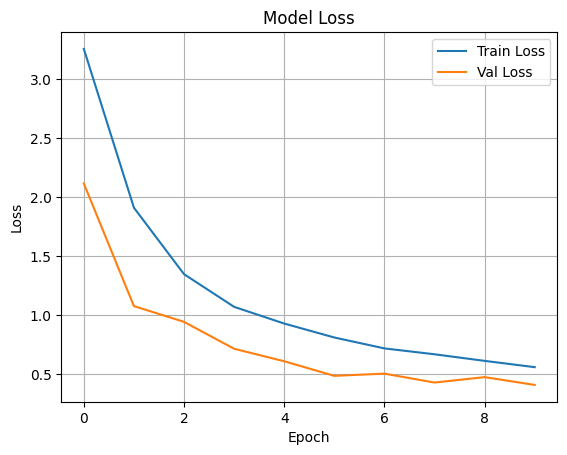

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save
model.save("asl_word_cnn_model.h5")
# model = tf.keras.models.load_model("asl_word_cnn_model.h5")

# Testing the model

In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose image from local machine

import os
img_path = next(iter(uploaded))
print("Uploaded image path:", img_path)

Saving hand1_7_bot_seg_3_cropped.jpeg to hand1_7_bot_seg_3_cropped.jpeg
Uploaded image path: hand1_7_bot_seg_3_cropped.jpeg


Saving hand4_a_bot_seg_4_cropped.jpeg to hand4_a_bot_seg_4_cropped.jpeg
Uploaded image path: hand4_a_bot_seg_4_cropped.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


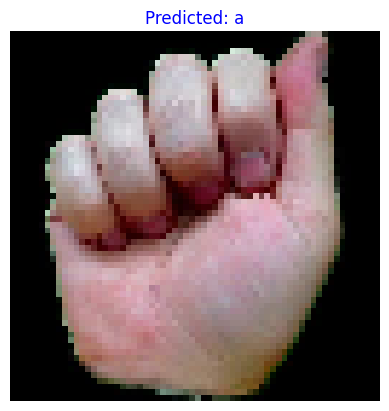

Prediction: a


In [ ]:
from google.colab import files
uploaded = files.upload()


import os

img_path = next(iter(uploaded))
print("Uploaded image path:", img_path)

import numpy as np

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Class index to label
class_indices = test_generator.class_indices
index_to_label = dict((v, k) for k, v in class_indices.items())

def predict_any_image(img_path, actual_label=None):
    # Load image and resize to match model input
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_label = index_to_label[predicted_index]

    # Display
    plt.imshow(img)
    plt.axis('off')
    title = f"Predicted: {predicted_label}"
    if actual_label:
        title += f"\nActual: {actual_label}"
        color = 'green' if predicted_label == actual_label else 'red'
    else:
        color = 'blue'

    plt.title(title, color=color, fontsize=12)
    plt.show()

    return predicted_label

# Predict and show
actual_label = None  # or e.g., "U", "C", "I" etc. if you know it
predicted_label = predict_any_image(img_path, actual_label)
print("Prediction:", predicted_label)

Saving hand1_7_bot_seg_5_cropped.jpeg to hand1_7_bot_seg_5_cropped (1).jpeg


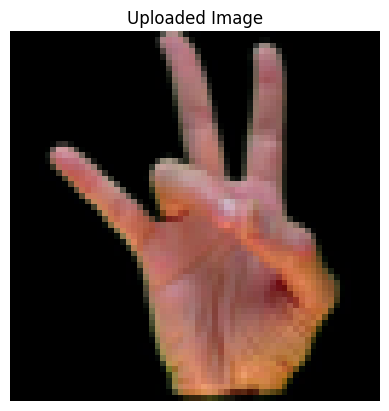

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Label: 7


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

def predict_uploaded_image():
    # Step 1: Upload image
    uploaded = files.upload()
    for file_name in uploaded.keys():
        # Step 2: Load and preprocess image
        img = Image.open(io.BytesIO(uploaded[file_name])).convert("RGB")
        img = img.resize((64, 64))

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.title("Uploaded Image")
        plt.show()

        # Step 3: Predict
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_label = class_labels[np.argmax(prediction)] # Use class_labels

        # Step 4: Output
        print("Predicted Label:", predicted_label)

predict_uploaded_image()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


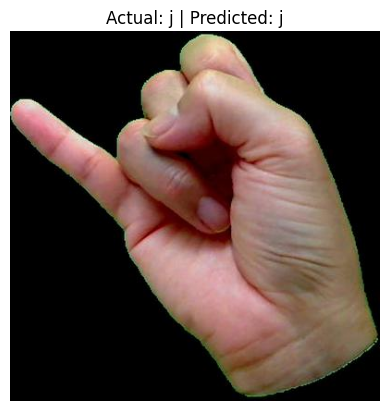

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


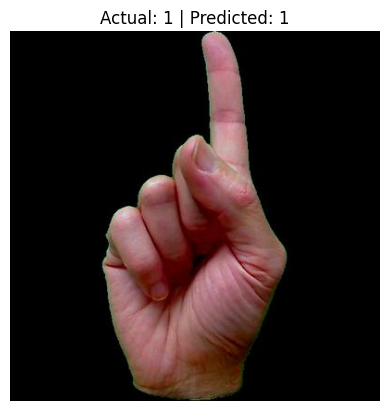

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


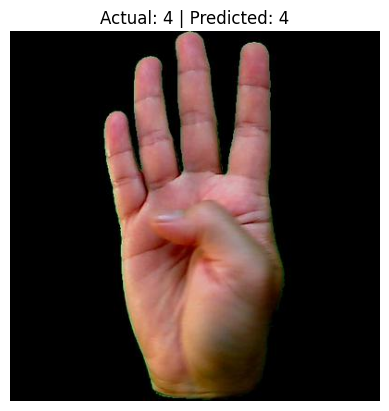

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


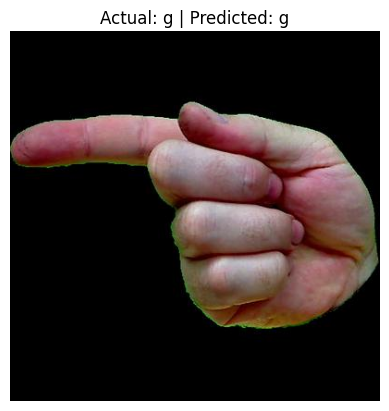

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


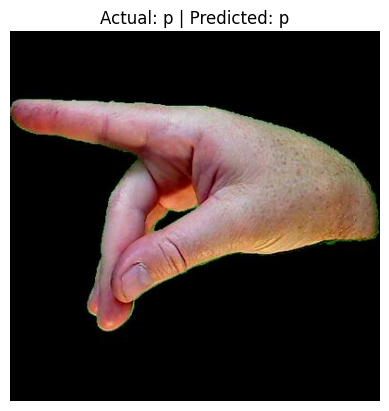

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

# Set path to your test folder (update this to your actual test dataset path)
test_folder_path = '/content/asl_dataset/asl_dataset/asl_dataset'

# Collect all image paths and their true labels
image_paths = []
labels = []

for label in os.listdir(test_folder_path):
    class_folder = os.path.join(test_folder_path, label)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(label)

# Pick 5 random indices
random_indices = random.sample(range(len(image_paths)), 5)

# Predict and display each image
for idx in random_indices:
    img_path = image_paths[idx]
    actual_label = labels[idx]

    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((64, 64))

    # Preprocess
    img_array = image.img_to_array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    predicted_label = class_labels[np.argmax(prediction)]

    # Display
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


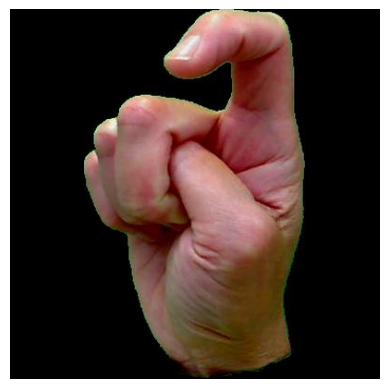

Predicted Sign: x
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


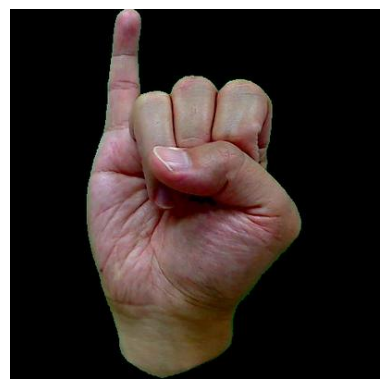

Predicted Sign: i
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


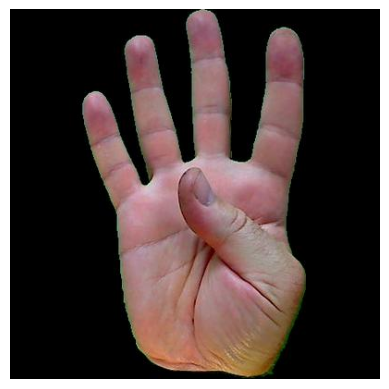

Predicted Sign: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


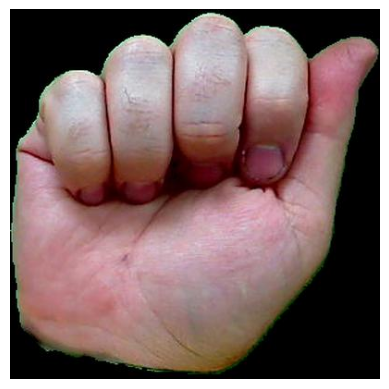

Predicted Sign: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


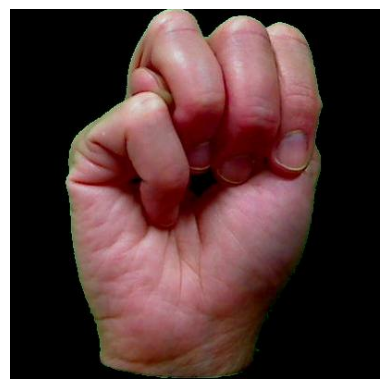

Predicted Sign: m
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


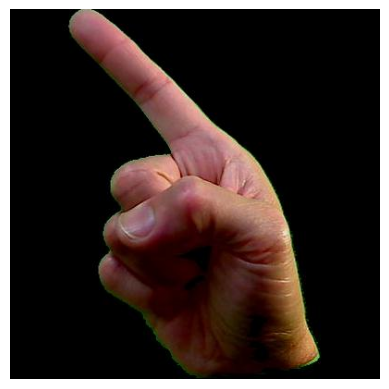

Predicted Sign: z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


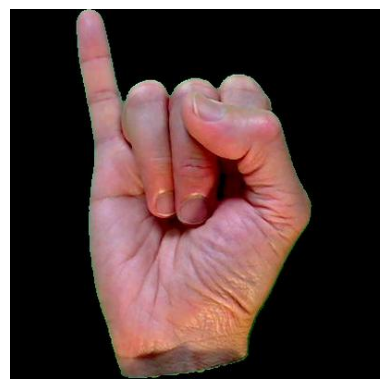

Predicted Sign: i
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


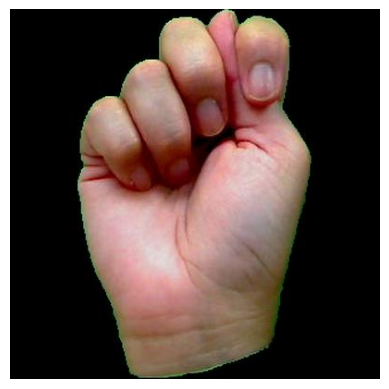

Predicted Sign: t
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


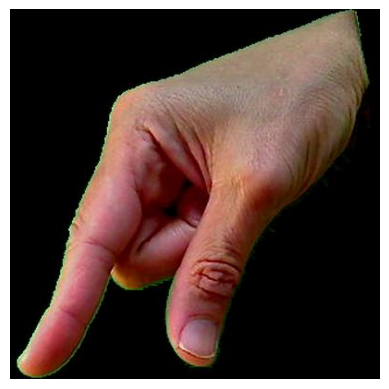

Predicted Sign: q
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


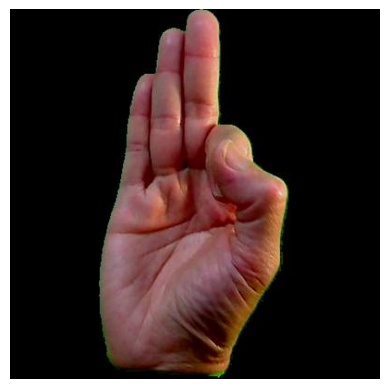

Predicted Sign: f


In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

# Path to your test dataset
test_folder_path = '/content/asl_dataset/asl_dataset/asl_dataset'

# Collect all image paths
image_paths = []
for label_folder in os.listdir(test_folder_path):
    folder_path = os.path.join(test_folder_path, label_folder)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            image_paths.append(os.path.join(folder_path, file_name))

# Randomly select 10 images
random_paths = random.sample(image_paths, 10)

# Predict and display
for img_path in random_paths:
    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((64, 64))

    img_array = image.img_to_array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_label = class_labels[np.argmax(prediction)] # Use class_labels

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Print the predicted sign below the image
    print(f"Predicted Sign: {predicted_label}")